# Import Libraries

In [1]:
#Import Required Python Libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score
from sklearn.svm import SVC
import pickle
from pickle import dump
from imblearn.over_sampling import SMOTE

# Import Processed Data

In [2]:
df = pd.read_csv('Processed_Final_Hotel_review.csv')
df.head()

,Unnamed: 0,Review,Rating,Rating_Analysis,Cleaned_Review,Lemmatized_Review,subjectivity,polarity,sentiment_polarity,neg_senti_score,neu_senti_score,pos_senti_score,compound,Sentiment_Vader_Compound,sentiment_spacy_score,sentiment_spacy,no_chars,no_words,pos_tags_words
0,0,nice hotel expensive parking got good deal sta...,4,Positive,nice hotel expensive parking good deal stay ho...,nice hotel expensive parking good deal stay ho...,0.723158,0.229599,Positive,0.064,0.608,0.329,0.9769,Positive,5,Positive,484,73,nice expensive good stay anniversary arrive la...
1,1,ok nothing special charge diamond member hilto...,2,Negative,special charge diamond member hilton decided c...,special charge diamond member hilton decide ch...,0.534312,0.222302,Positive,0.049,0.735,0.216,0.9904,Positive,12,Positive,1410,205,special shot anniversary seattle suite extra w...
2,2,nice rooms not 4* experience hotel monaco seat...,3,Neutral,nice rooms experience hotel monaco seattle goo...,nice room experience hotel monaco seattle good...,0.598765,0.341534,Positive,0.048,0.677,0.275,0.9937,Positive,10,Positive,1197,174,nice seattle good large comfortable pillowsatt...
3,3,"unique, great stay, wonderful time hotel monac...",5,Positive,unique great stay wonderful time hotel monaco ...,unique great stay wonderful time hotel monaco ...,0.691228,0.504825,Positive,0.000,0.564,0.436,0.9940,Positive,14,Positive,523,80,unique great wonderful excellent short main fr...
4,4,"great stay great stay, went seahawk game aweso...",5,Positive,great stay great stay seahawk game awesome dow...,great stay great stay seahawk game awesome dow...,0.696753,0.475649,Positive,0.078,0.623,0.299,0.9929,Positive,5,Positive,1007,155,great great seahawk awesome build huge helpful...


In [3]:
df = df.drop("Unnamed: 0",axis=1)

# Data Preparation

In [4]:
def rating_label(x):
    """
    0 refers to Negative, 1 refers to Neutral, 2 refers to Negative Review.
    """
    if x==1 or x==2:
        return 0
    elif x==3:
        return 1
    else:
        return 2

In [5]:
X=df['Lemmatized_Review']
y=df['Rating'].apply(lambda x: rating_label(x))
X.shape,y.shape

((20491,), (20491,))

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((16392,), (4099,), (16392,), (4099,))

# TF - IDF Vectorization

In [7]:
tf_idf = TfidfVectorizer(max_features=2000)
x_train_sparse = tf_idf.fit_transform(X_train)
x_train_df = pd.DataFrame(x_train_sparse.toarray(), columns=tf_idf.get_feature_names())
x_train_df.head()

,absolute,absolutely,ac,accept,acceptable,access,accessible,accommodate,accommodation,accomodate,...,wyndham,yard,year,yellow,yogurt,york,young,youçéèe,yr,zoo
0,0.0,0.0,0.0,0.0,0.0,0.055446,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.135813,0.0,0.0,0.0


In [8]:
x_test_sparse = tf_idf.fit_transform(X_test)
x_test_df = pd.DataFrame(x_test_sparse.toarray(), columns=tf_idf.get_feature_names())
x_test_df.head()

,absolute,absolutely,ac,accept,acceptable,access,accessible,accommodate,accommodation,accomodating,...,wrong,yard,year,yellow,yoghurt,yogurt,york,young,youçéèe,yummy
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.332023,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [9]:
len(tf_idf.get_feature_names())

2000

In [10]:
x_train_df.shape,x_test_df.shape

((16392, 2000), (4099, 2000))

# Model Building / Model Evaluation / Model Testing

# Support Vector Machines - Classifier

In [11]:
svm_model = SVC()

In [12]:
svm_model.fit(x_train_df,y_train)

SVC()

In [13]:
svm_pred_train=svm_model.predict(x_train_df)
svm_pred_test=svm_model.predict(x_test_df)
svm_train_acc=accuracy_score(svm_pred_train,y_train)
svm_test_acc=accuracy_score(svm_pred_test,y_test)
print('Training Accuracy : ',(svm_train_acc*100).round(2))
print('Testing Accuracy  : ',(svm_test_acc*100).round(2))

Training Accuracy :  95.63
Testing Accuracy  :  67.6


In [14]:
svm_f1_tr=f1_score(svm_pred_train,y_train,average='weighted')
svm_f1_t=f1_score(svm_pred_test,y_test,average='weighted')
print('Training F1 Score : ',(svm_f1_tr*100).round(2))
print('Testing F1 Score  : ',(svm_f1_t*100).round(2))

Training F1 Score :  95.95
Testing F1 Score  :  70.66


In [15]:
svm_train=pd.DataFrame.from_dict(classification_report(svm_pred_train,y_train,output_dict=True))
print('\033[1m'+'\nSVM - Training Data')
svm_train.round(2)


SVM - Training Data


,0,1,2,accuracy,macro avg,weighted avg
precision,0.96,0.66,1.00,0.96,0.87,0.97
recall,0.96,0.99,0.95,0.96,0.97,0.96
f1-score,0.96,0.79,0.97,0.96,0.91,0.96
support,2551.00,1170.00,12671.00,0.96,16392.00,16392.00


In [16]:
svm_test=pd.DataFrame.from_dict(classification_report(svm_pred_test,y_test,output_dict=True))[['0','1','2','weighted avg']]
print('\033[1m'+'\nSVM - Testing Data')
svm_test.round(2)


SVM - Testing Data


,0,1,2,weighted avg
precision,0.38,0.00,0.84,0.74
recall,0.29,0.50,0.78,0.68
f1-score,0.33,0.01,0.81,0.71
support,841.00,4.00,3254.00,4099.00



Confusion Matrix - SVM - Training Data


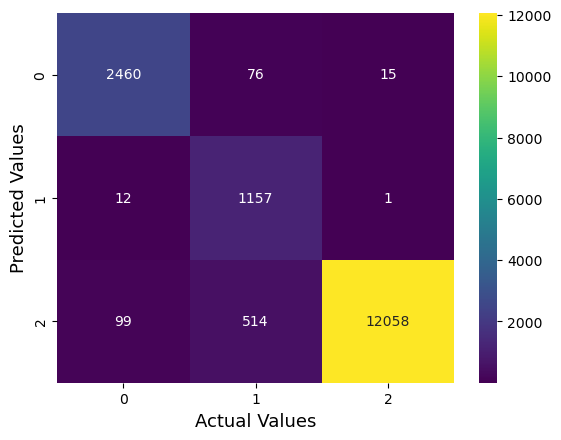

In [17]:
print('\033[1m'+'\nConfusion Matrix - SVM - Training Data')
sns.heatmap(confusion_matrix(svm_pred_train,y_train),
            annot=True,fmt='.0f',cmap="viridis",xticklabels=[0,1,2],yticklabels=[0,1,2])
plt.xlabel('Actual Values',size=13)
plt.ylabel('Predicted Values',size=13)
plt.show()


Confusion Matrix - SVM - Testing Data


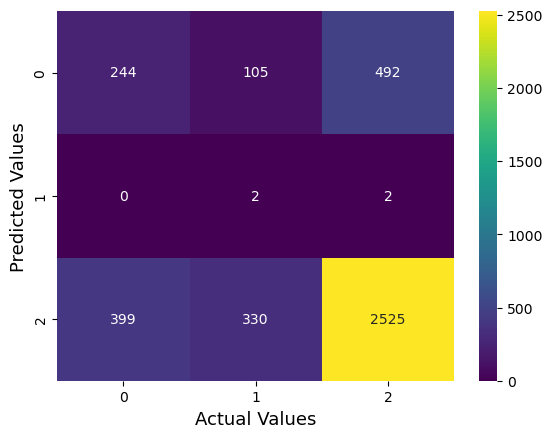

In [18]:
print('\033[1m'+'\nConfusion Matrix - SVM - Testing Data')
sns.heatmap(confusion_matrix(svm_pred_test,y_test),
            annot=True,fmt='.0f',cmap="viridis",xticklabels=[0,1,2],yticklabels=[0,1,2])
plt.xlabel('Actual Values',size=13)
plt.ylabel('Predicted Values',size=13)
plt.show()

# Deployment

In [19]:
#Build Intelligence for TfidfVectorizer by training with whole dataset(Cleaned/Lemmatized Review Column)
tf_idf_deploy = TfidfVectorizer()
tf_idf_deploy.fit(X)

TfidfVectorizer()

In [20]:
#Transform Text into Numerical data for Building SVM
X_sparse = tf_idf_deploy.transform(X)

In [21]:
#Build Intelligence for Logistic Regression Model by training converted numerical dataset from TfidfVectorizer function
svm_deploy = SVC(probability=True)
svm_deploy.fit(X_sparse,y)


SVC(probability=True)

# Pickle File

In [22]:
#Saving Both SVM and TfidfVectorizer Intelligence into Pickle file for deployment
dump(obj=svm_deploy,file=open('svm_deploy.pkl','wb'))
dump(obj=tf_idf_deploy,file=open('tf_idf_deploy.pkl','wb'))

# Applying Smote Technique For Over Sampling

In [23]:
#Before Smote
y_train.value_counts()

2    12074
0     2571
1     1747
Name: Rating, dtype: int64

In [24]:
smote =SMOTE()

In [25]:
x_train_df,y_train=smote.fit_resample(x_train_df,y_train)

In [26]:
x_train_df.shape,x_test_df.shape

((36222, 2000), (4099, 2000))

In [27]:
#After Smote
y_train.value_counts()

2    12074
0    12074
1    12074
Name: Rating, dtype: int64

# Model Building / Model Evaluation / Model Testing

# Support Vector Machines - Classifier

In [28]:
svm_model = SVC()

In [29]:
svm_model.fit(x_train_df,y_train)

SVC()

In [30]:
svm_pred_train=svm_model.predict(x_train_df)
svm_pred_test=svm_model.predict(x_test_df)
svm_train_acc=accuracy_score(svm_pred_train,y_train)
svm_test_acc=accuracy_score(svm_pred_test,y_test)
print('Training Accuracy : ',(svm_train_acc*100).round(2))
print('Testing Accuracy  : ',(svm_test_acc*100).round(2))

Training Accuracy :  99.75
Testing Accuracy  :  69.41


In [31]:
svm_f1_tr=f1_score(svm_pred_train,y_train,average='weighted')
svm_f1_t=f1_score(svm_pred_test,y_test,average='weighted')
print('Training F1 Score : ',(svm_f1_tr*100).round(2))
print('Testing F1 Score  : ',(svm_f1_t*100).round(2))

Training F1 Score :  99.75
Testing F1 Score  :  73.6


In [32]:
svm_train=pd.DataFrame.from_dict(classification_report(svm_pred_train,y_train,output_dict=True))
print('\033[1m'+'\nSVM - Training Data')
svm_train.round(2)


SVM - Training Data


,0,1,2,accuracy,macro avg,weighted avg
precision,1.0,0.99,1.00,1.0,1.0,1.0
recall,1.0,1.00,0.99,1.0,1.0,1.0
f1-score,1.0,1.00,1.00,1.0,1.0,1.0
support,12072.0,12011.00,12139.00,1.0,36222.0,36222.0


In [33]:
svm_test=pd.DataFrame.from_dict(classification_report(svm_pred_test,y_test,output_dict=True))
print('\033[1m'+'\nSVM - Testing Data')
svm_test.round(2)


SVM - Testing Data


,0,1,2,accuracy,macro avg,weighted avg
precision,0.31,0.00,0.87,0.69,0.40,0.78
recall,0.31,0.29,0.77,0.69,0.45,0.69
f1-score,0.31,0.01,0.82,0.69,0.38,0.74
support,650.00,7.00,3442.00,0.69,4099.00,4099.00



Confusion Matrix - SVM - Training Data


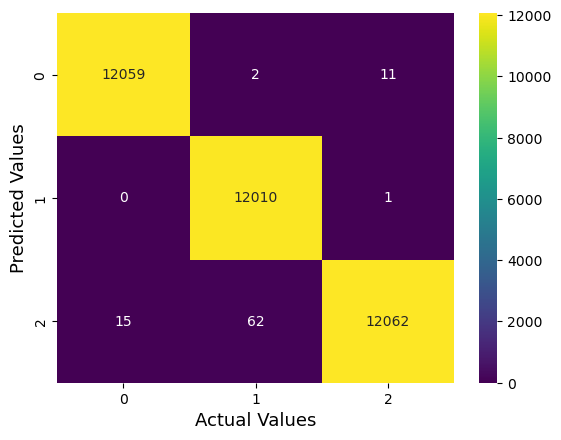

In [34]:
print('\033[1m'+'\nConfusion Matrix - SVM - Training Data')
sns.heatmap(confusion_matrix(svm_pred_train,y_train),
            annot=True,fmt='.0f',cmap="viridis",xticklabels=[0,1,2],yticklabels=[0,1,2])
plt.xlabel('Actual Values',size=13)
plt.ylabel('Predicted Values',size=13)
plt.show()



Confusion Matrix - SVM - Testing Data


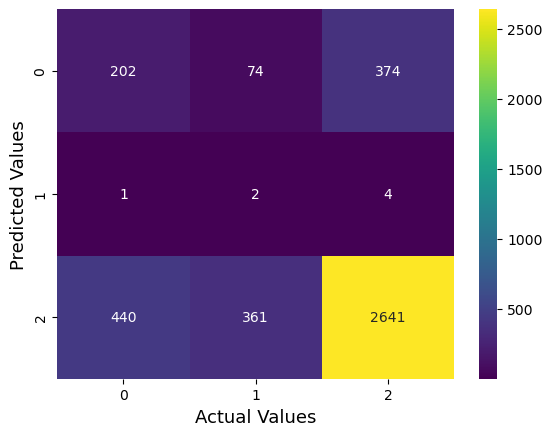

In [35]:
print('\033[1m'+'\nConfusion Matrix - SVM - Testing Data')
sns.heatmap(confusion_matrix(svm_pred_test,y_test),
            annot=True,fmt='.0f',cmap="viridis",xticklabels=[0,1,2],yticklabels=[0,1,2])
plt.xlabel('Actual Values',size=13)
plt.ylabel('Predicted Values',size=13)
plt.show()

# Deployment

In [36]:
#Build Intelligence for TfidfVectorizer by training with whole dataset(Cleaned/Lemmatized Review Column)
tf_idf_deploy = TfidfVectorizer()
tf_idf_deploy.fit(X)

TfidfVectorizer()

In [37]:
#Transform Text into Numerical data for Building SVM
X_sparse = tf_idf_deploy.transform(X)

In [38]:
X_sparse,y=smote.fit_resample(X_sparse,y)

In [39]:
#Build Intelligence for Logistic Regression Model by training converted numerical dataset from TfidfVectorizer function
svm_deploy = SVC(probability=True)
svm_deploy.fit(X_sparse,y)

SVC(probability=True)

# Pickle file

In [41]:
#Saving Both SVM and TfidfVectorizer Intelligence into Pickle file for deployment
dump(obj=svm_deploy,file=open('svm_deploy_smote.pkl','wb'))
dump(obj=tf_idf_deploy,file=open('tf_idf_deploy_smote.pkl','wb'))

# END